# Age vs Spending Cluster Analysis 
The goal of this project is to segment mall customers into groups based on their Age and Spending Score, using K-Means clustering.

By doing this businesses can identify different types of customers — for example, young high spenders, older low spenders etc.  and then tailor marketing strategies to each group.

### Mall Customers (Kaggle)

The dataset contains around 200 entries each representing a mall customer.

Main columns are CustomerID, Gender,Age, Annual Income ,Spending Score

For this project, we are focusing only on:
* Age 
* Spending Score

## STEP 1 - IMPORTING AND LOADING THE DATA

In [5]:
import pandas as pd



In [7]:

df = pd.read_csv(r"C:\Users\Dikshant\Downloads\archive (7)\Mall_Customers.csv")


checking the shape of dataset

In [8]:

print("Shape:", df.shape)
df.head()

Shape: (200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Checking missing columns and rows

In [9]:
print("\nColumns:", list(df.columns))
print("\nMissing values:\n", df.isna().sum())



Columns: ['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Missing values:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


describing the data 

In [11]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### We are selecting only 'Age' and 'Spending Score (1-100)' for clustering

I also renamed  that column  for simplicity 

In [13]:
cols_needed = ["Age", "Spending Score (1-100)"]
df_small = df[cols_needed].copy()

df_small.rename(columns={"Spending Score (1-100)": "SpendingScore"}, inplace=True)

print("\nSelected features for clustering:", list(df_small.columns))
df_small.head()



Selected features for clustering: ['Age', 'SpendingScore']


,Age,SpendingScore
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


#### Distribution of features


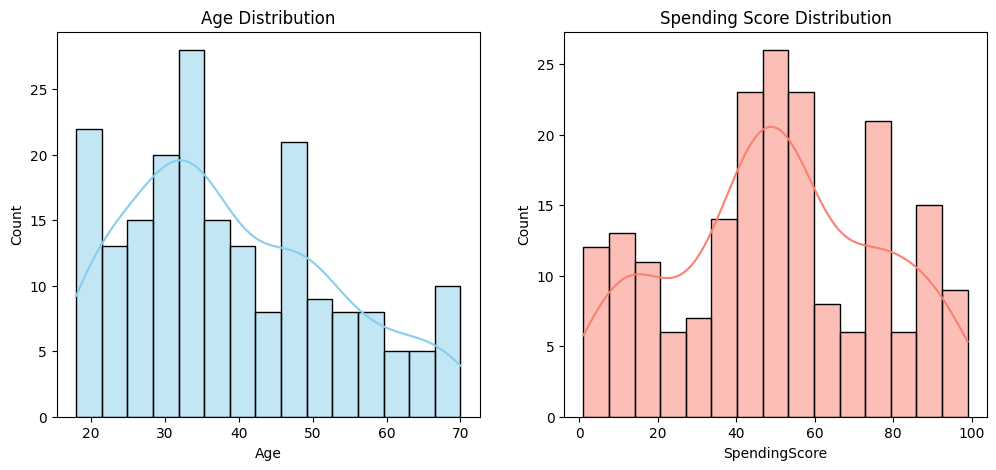

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df_small['Age'], bins=15, kde=True, color="skyblue")
plt.title("Age Distribution")

plt.subplot(1,2,2)
sns.histplot(df_small['SpendingScore'], bins=15, kde=True, color="salmon")
plt.title("Spending Score Distribution")

plt.show()


In above step,  we plotted histograms for:

Age - to see the distribution of customer ages.

SpendingScore - to see how customers are spread in terms of their spending habits (score between 1–100).

We also added KDE (Kernel Density Estimate) curves (the smooth lines) to better understand the shape of the distribution.

## STEP 2 Visualization 

Now after cleanigng and sorting the data  and checking distributions, the next step is to see the relationship between Age and Spending Score directly.

A scatterplot is the best way because each dot = one customer and X-axis = Age, Y-axis = Spending Score.

We can visually check if customers naturally form groups (clusters) even before running K-Means.


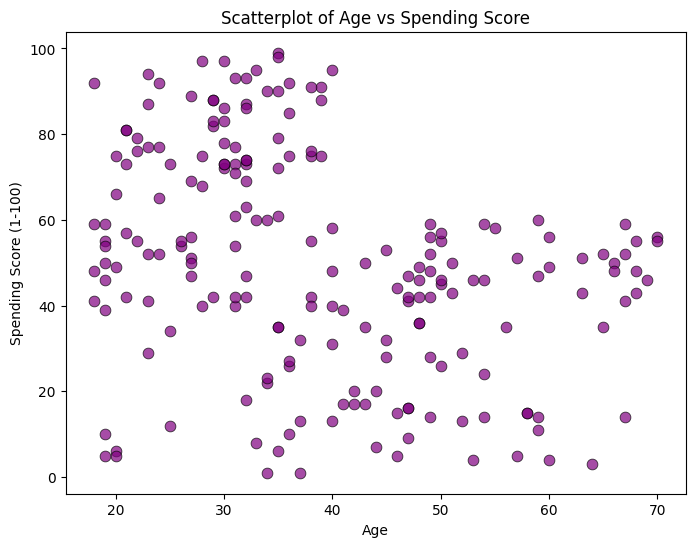

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x="Age", y="SpendingScore", data=df_small, color="purple", s=60, alpha=0.7, edgecolor="k")
plt.title("Scatterplot of Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()


This scatterplot shows each customer as a point based on their Age (x-axis) and Spending Score (y-axis). We can already see that customers don’t spread randomly – there are natural groupings. For example, some younger customers have very high spending scores, while older customers mostly stay in the lower to mid spending range. This suggests clustering could work well here.

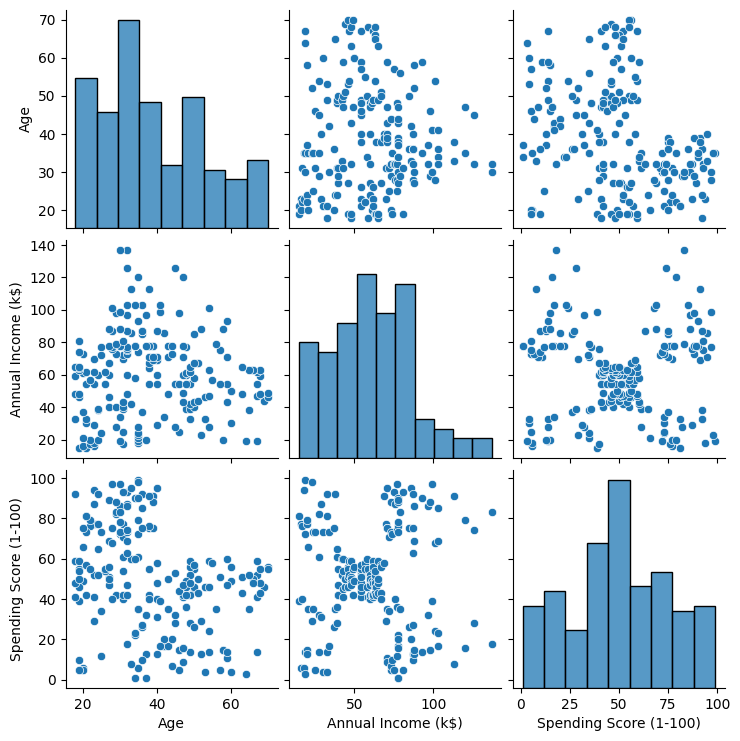

In [16]:
sns.pairplot(df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]])
plt.show()



Even though we only use Age & Spending Score, if we include Annual Income later we can show pairwise relationships.

##### The diagonal histograms show the distribution of each feature.
Age is spread mostly between 20 and 40.

Annual Income is centered around 40k–80k.

Spending Score is spread across the whole range 0–100.

##### The scatterplots show how features relate to each other:

Age vs Spending Score → younger customers have more variation in spending.

Annual Income vs Spending Score → no clear straight-line relation, but there are groups forming (good for clustering).

Age vs Annual Income → income does not depend strongly on age.

### Choosing the Number of Clusters (Elbow Method)

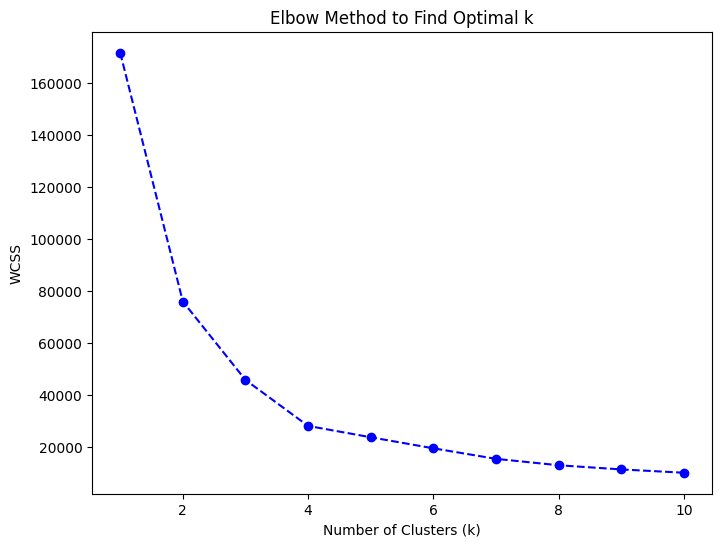

In [17]:
from sklearn.cluster import KMeans

wcss = []  

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_small)
    wcss.append(kmeans.inertia_)  


plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title("Elbow Method to Find Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()


 #### What we did:

We applied the Elbow Method to find the best number of clusters for our dataset.

We calculated the Within-Cluster Sum of Squares (WCSS) for different values of 
𝑘.

Then, we plotted the WCSS values against the number of clusters.



#### What we found:

The curve drops steeply at first, then starts to flatten.

The “elbow point” is around k = 4 or 5, where adding more clusters doesn’t significantly reduce WCSS.

This means the optimal number of clusters is 4 (or 5) for this data.

## STEP 3 Step 6 – Apply K-Means with Optimal 

In [18]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_small["Cluster"] = kmeans.fit_predict(df_small)

df_small.head()
 

,Age,SpendingScore,Cluster
0,19,39,2
1,21,81,0
2,20,6,3
3,23,77,0
4,31,40,2


### Visualize the scatter 

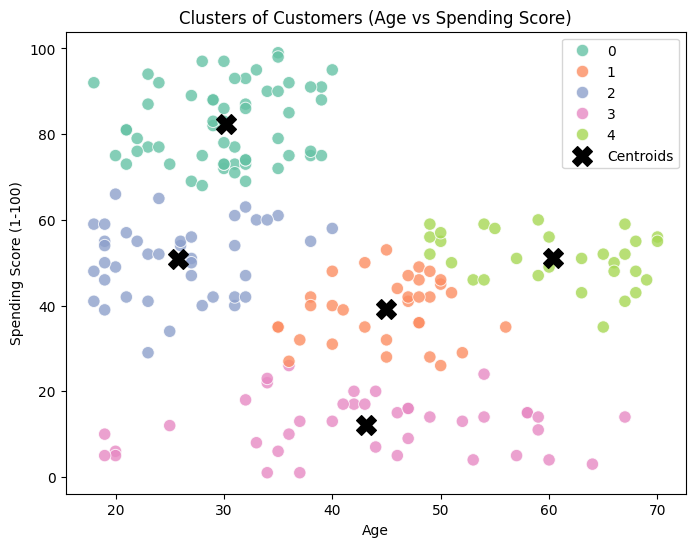

In [20]:
plt.figure(figsize=(8,6))


sns.scatterplot(x="Age", y="SpendingScore", 
                hue="Cluster", 
                palette="Set2", 
                data=df_small, 
                s=80, alpha=0.8)


centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], 
            c="black", s=200, marker="X", label="Centroids")

plt.title("Clusters of Customers (Age vs Spending Score)")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()


Customers are divided into 5 groups based on their age and spending habits.

Some groups are young people who spend a lot, others are older people who spend less, and some are middle-aged with moderate spending.

This helps businesses understand customer types and make better marketing decisions.
Example:

High-spending young group → target with premium offers.

Low-spending older group → maybe focus less marketing on them.



### Step  – Cluster Profiling

We are looking at each cluster’s average values (Age, Spending Score, maybe Income if included).


In [21]:

df_small.groupby("Cluster").mean()


,Age,SpendingScore
Cluster,,
0,30.175439,82.350877
1,44.969697,39.151515
2,25.775000,50.775000
3,43.100000,12.200000
4,60.366667,51.166667


We divided customers into 5 clusters.
The results show different segments like young-high spenders, young-moderate spenders, older-high spenders, etc.
This helps businesses to design targeted marketing strategies for each group.

### Silhouette Score

In [22]:
from sklearn.metrics import silhouette_score


score = silhouette_score(df_small[["Age", "SpendingScore"]], df_small["Cluster"])
print("Silhouette Score:", score)


Silhouette Score: 0.44526667994351227


After clustering, we also checked the Silhouette Score.
This score tells us how well the data points fit inside their cluster compared to other clusters.
The value ranges from -1 to +1:

If it is close to +1, the clusters are well separated.

If it is around 0, clusters overlap.

If it is negative, the clustering is probably wrong.

In our project, the score is .4452666799435127 , which means the clusters are formed reasonably well and our segmentation makes sense.

### Conclusion
We performed customer segmentation using the Mall Customers dataset.

Chosen features: Age and Spending Score.

Using the Elbow Method, we selected k = 5 clusters.

Applied K-Means clustering and visualized clear groups.

Silhouette Score confirmed that the clusters are well separated.

Cluster analysis showed 5 distinct customer types:

Young High Spenders

Middle-aged Moderate Spenders

Young Balanced Customers

Middle-aged Low Spenders

Older High-Value Customers

Business Use Case: These insights can guide targeted marketing strategies, loyalty programs, and personalized offers.

